In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
#이 데이터셋의 경우 ;(세미콜론)을 기준으로 데이터가 나누어져있기 때문에 sep ';' 기준으로 진행 
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Analysis

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
#object 데이터 타입을 가진 열에 각각 어떤 카테고리가 있는지 확인하기

for col in bank.columns:
    print()
    if bank[col].dtype == 'object':
        print(f"Name of Column is: {col} and unique values are: {bank[col].unique()}")



Name of Column is: job and unique values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Name of Column is: marital and unique values are: ['married' 'single' 'divorced' 'unknown']

Name of Column is: education and unique values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Name of Column is: default and unique values are: ['no' 'unknown' 'yes']

Name of Column is: housing and unique values are: ['no' 'yes' 'unknown']

Name of Column is: loan and unique values are: ['no' 'yes' 'unknown']

Name of Column is: contact and unique values are: ['telephone' 'cellular']

Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Name of Column is: day_of_week and unique values are: ['mon' 'tue' 'wed' 'thu' 'fri']





Name of Column is: poutcome and unique valu

In [126]:
#카테고리별 plotting graphs 그리기

def return_categorical(bank):
    categorical_columns = [column_name for column_name in bank if bank[column_name].dtype == 'object']
    return categorical_columns

bank.columns
#추가로 간단하게 구현하는 방법 알아보기!!

Index(['age', 'job', 'default', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

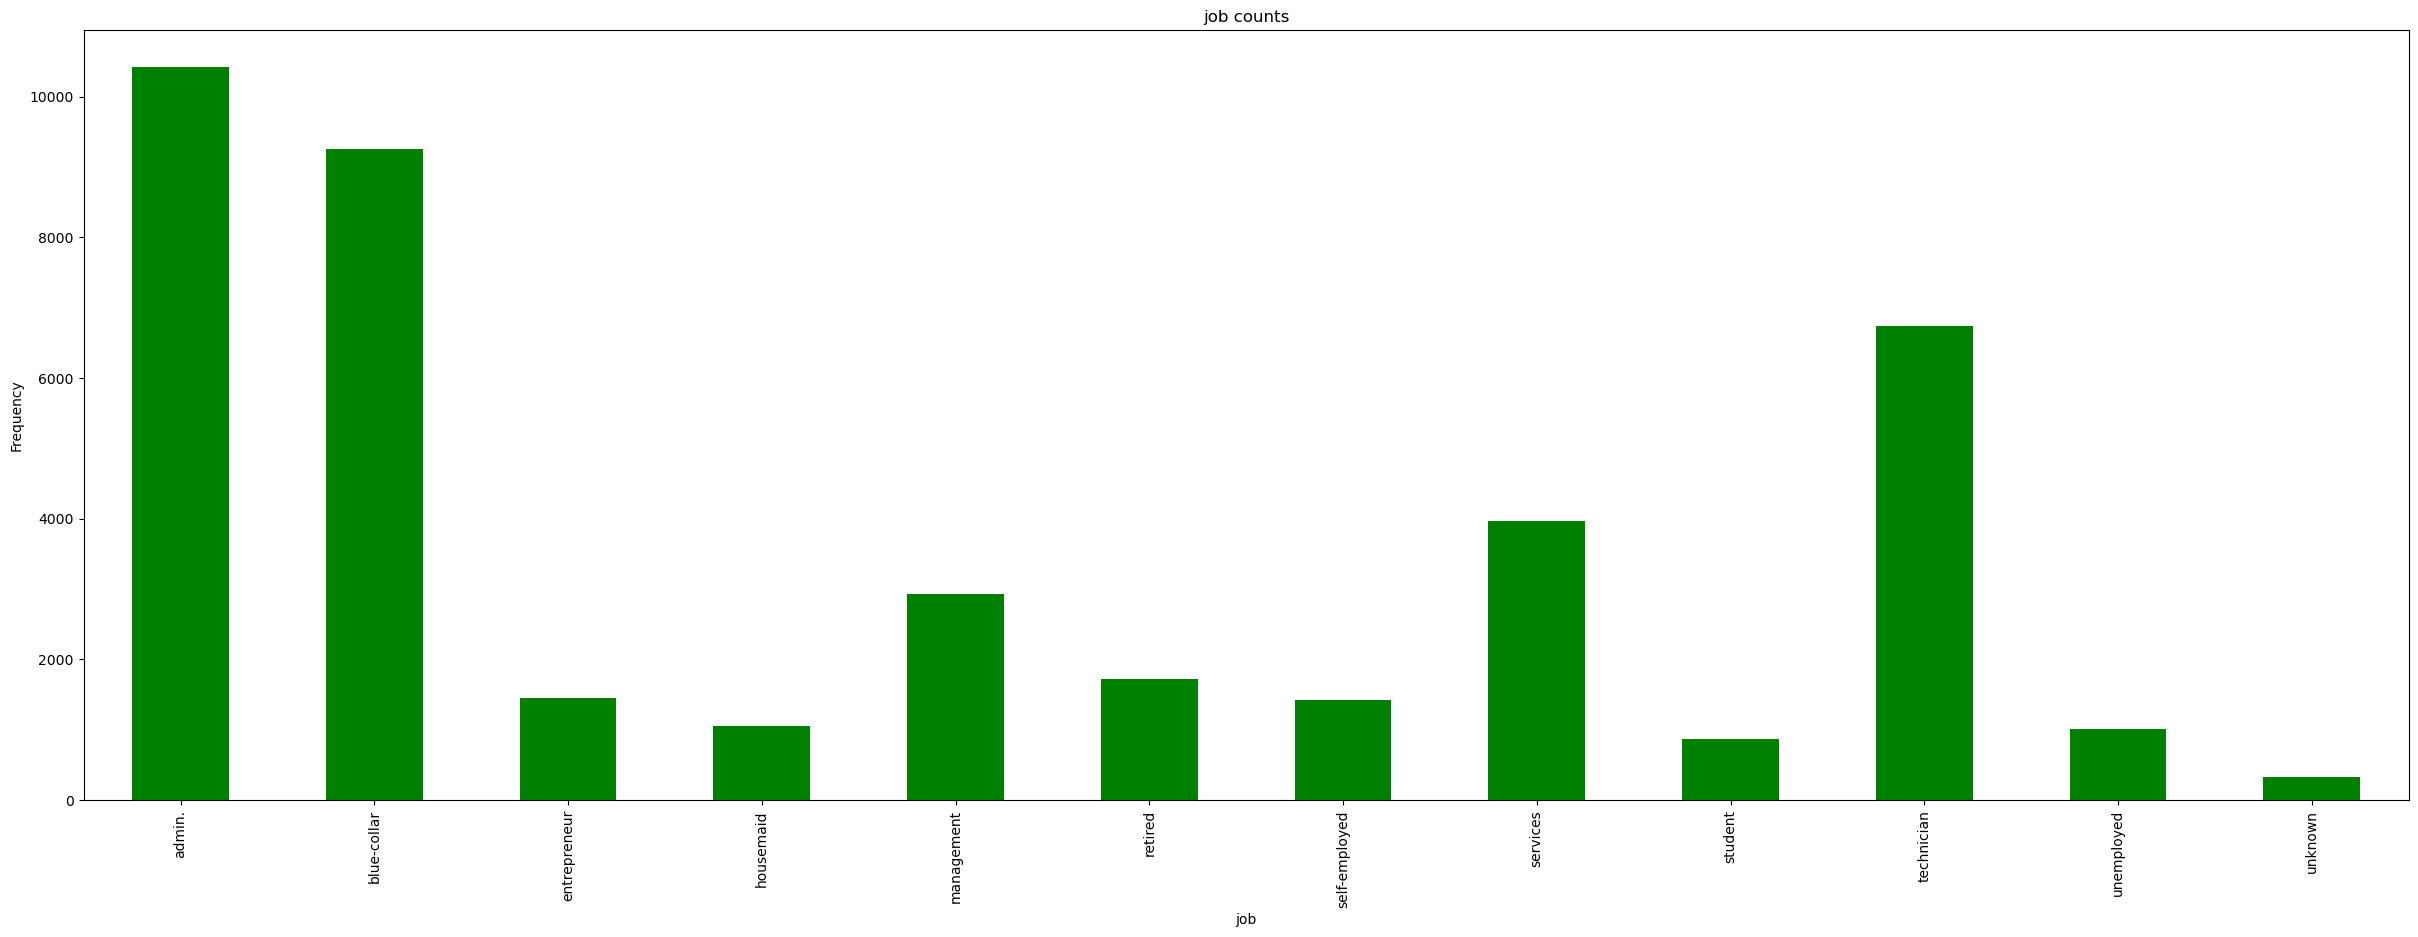

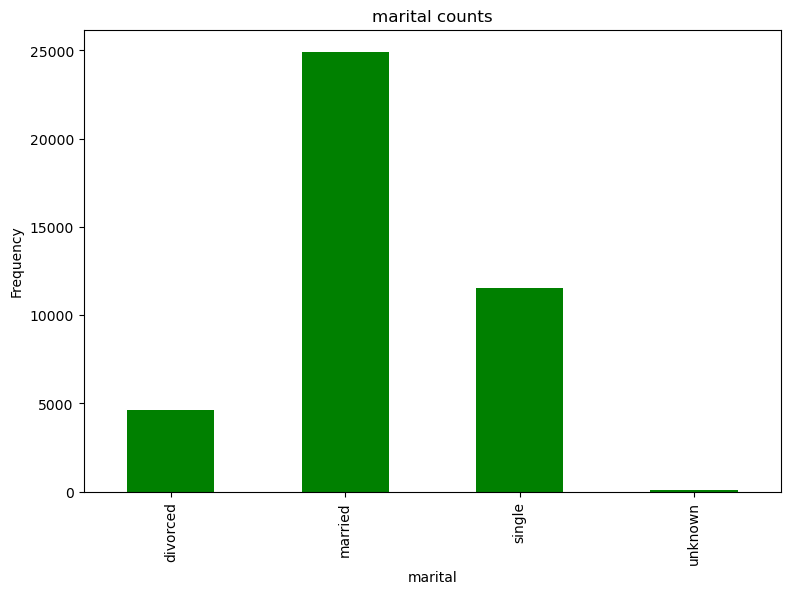

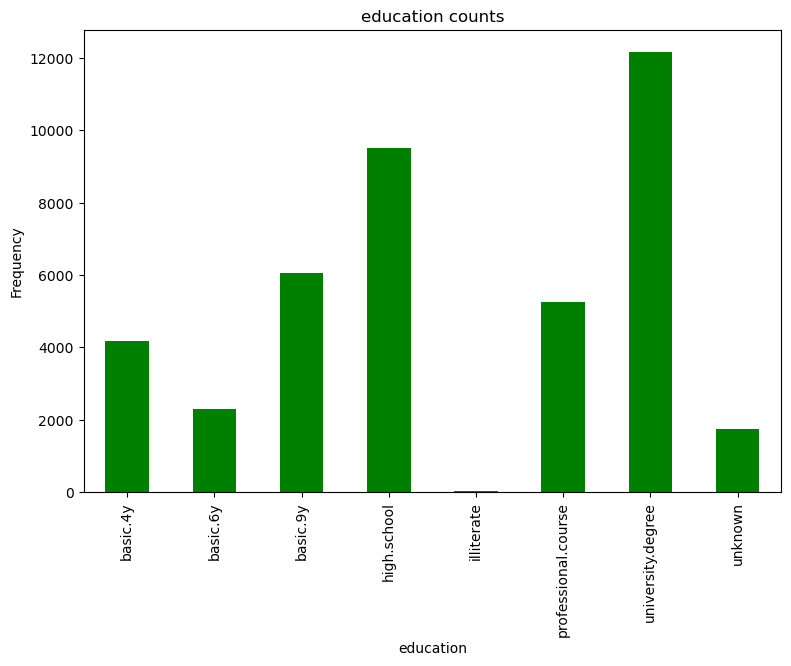

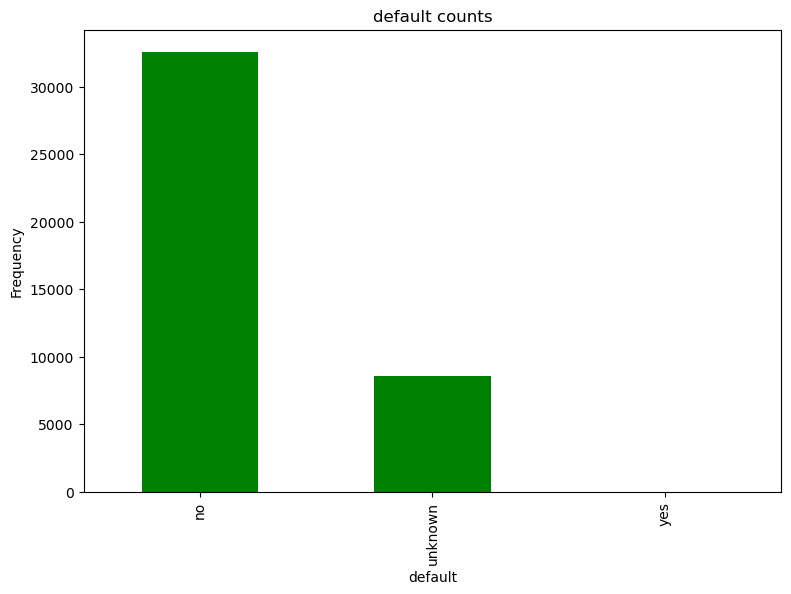

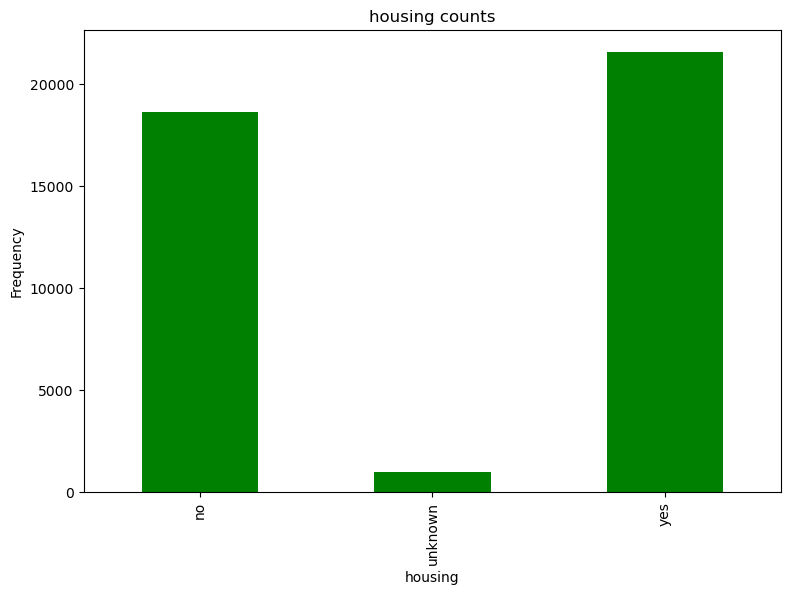

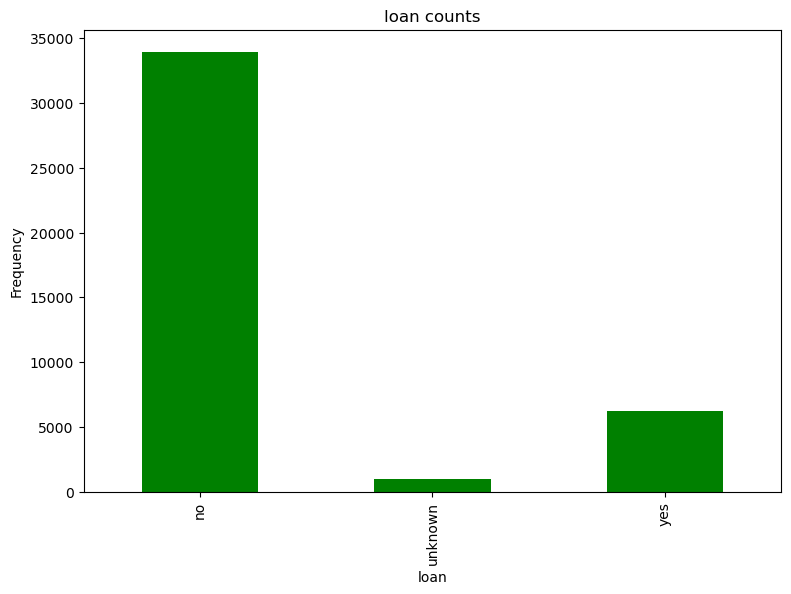

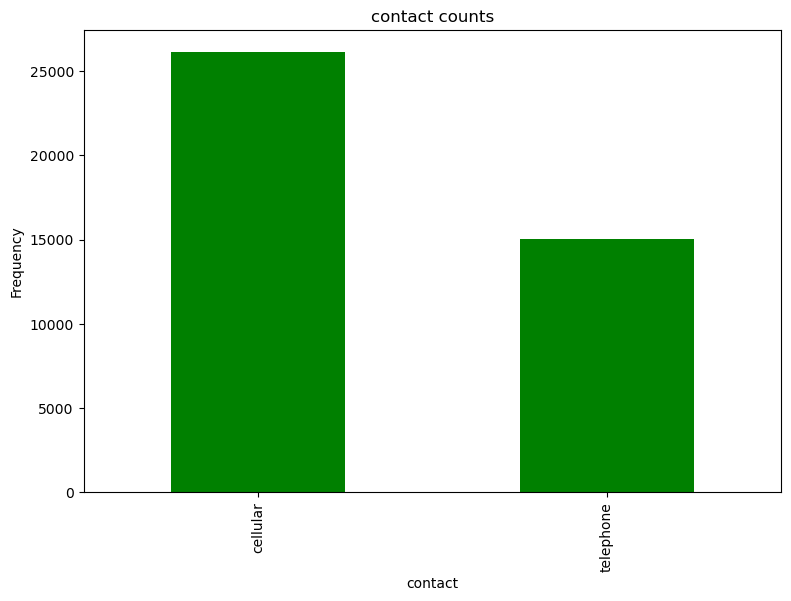

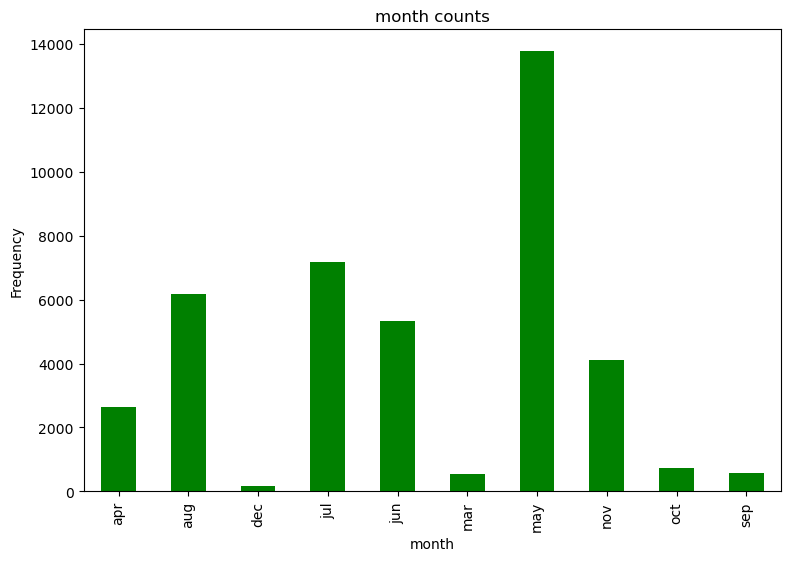

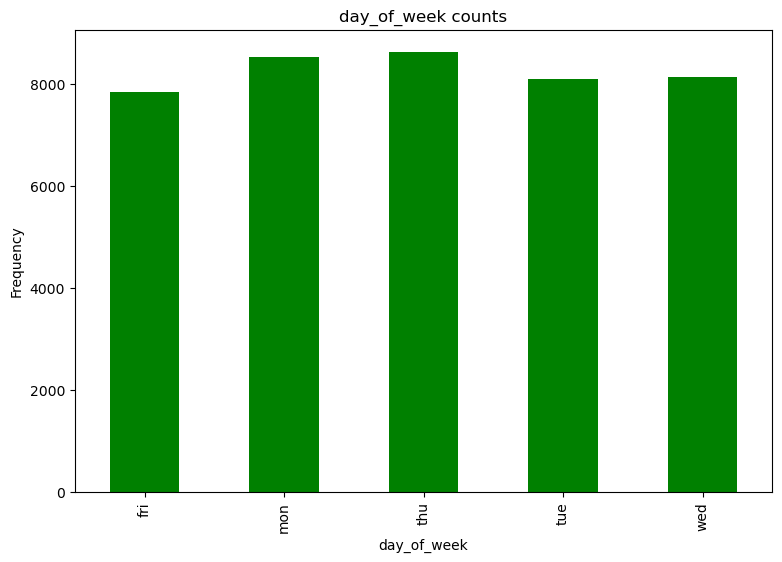

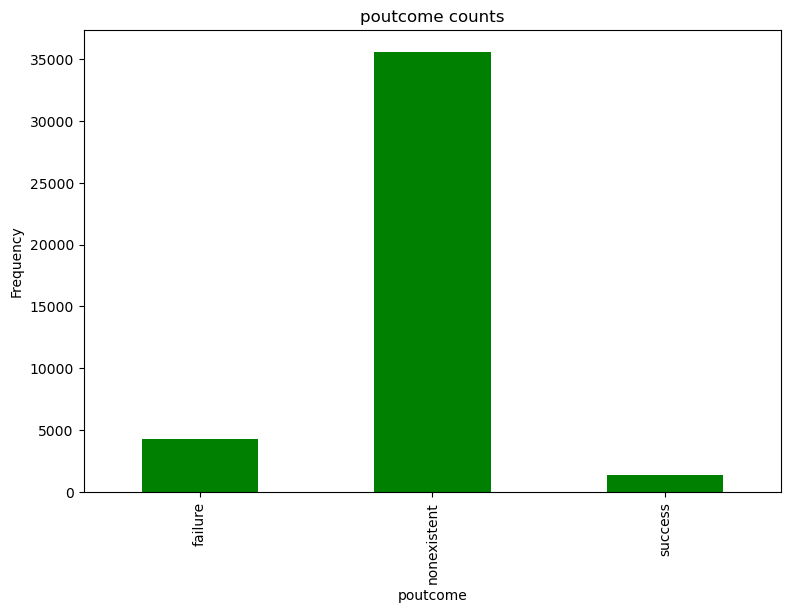

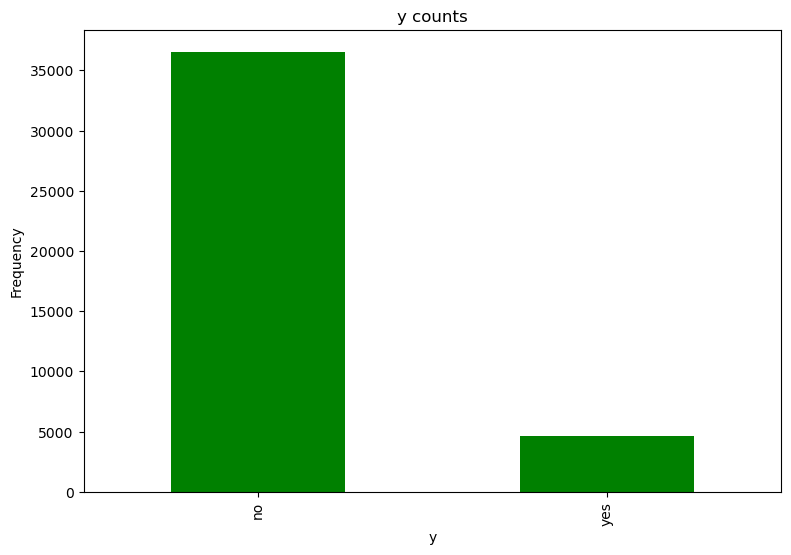

In [24]:
for col in return_categorical(bank):
    counts = bank[col].value_counts().sort_index()
    if len(counts)>10:
        fig = plt.figure(figsize = (30,10))
    else:
        fig = plt.figure(figsize = (9,6))
    ax = fig.gca() #현재 figure를 확인하기 위한 방법으로 axes 객체를 반환
    counts.plot.bar(ax = ax, color = 'green')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
#month - may 5월에 컨택한 수가 가장 많음
#day of week - 요일별로 컨택 수는 거의 동일
#marital - married 수치가 가장 크다
#loan - 대출금은 없는 사람이 다수
#contact - cellular > telephone
#고객이 예금을 예치했는지에 대한 물음인 y에는 87.5% 정도가 예치하지 않았음을 알 수 있음

In [28]:
#각 컬럼들의 상관관계를 알아보기

corr = bank.corr()
corr_greater_than_50 = corr[corr > .50]
corr_greater_than_50

#자동으로 숫자 데이터타입을 가진 컬럼들끼리만 비교된다는 것을 알 수 있음

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,0.688230,0.522034
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,0.688230,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,0.522034,NaN,0.945154,1.000000


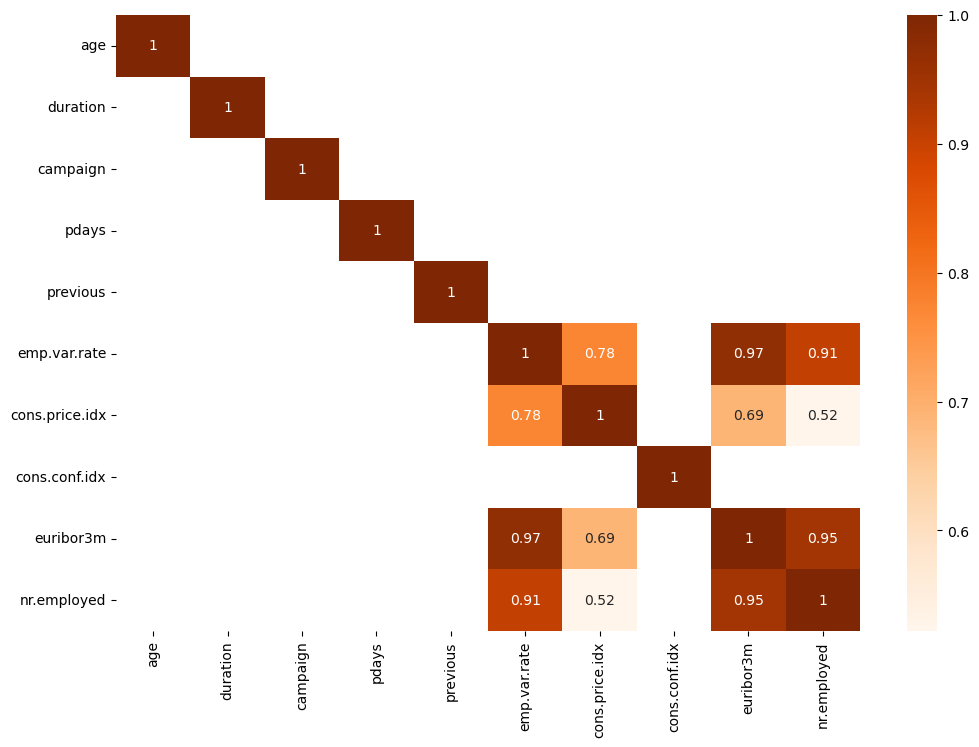

In [33]:
#상관관계를 도표로 표현하기

import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(corr_greater_than_50, cmap = 'Oranges', annot = True);

In [34]:
#.90대 상관관계를 가지는 변수
#고용변동률과 3개월 금리 0.97
#종업원 수와 3개월 금리 0.95
#종업원 수와 고용변동률 0.91
#결국 세가지 속성 사이에는 높은 상관관계를 보인다는 것을 알 수 있음

In [38]:
#이전 캠페인에서 고객이 마지막으로 연락된 일수

bank['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [39]:
#999는 이전 캠페인에서 연락이 되지 않았음을 의미하는데, 999의 수가 압도적으로 많음

In [52]:
bank_campaign = bank['campaign'].value_counts()
print(bank_campaign)

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64


In [47]:
def return_numerical(bank):
    return list(set(bank.columns) - set(return_categorical(bank)))
#histplot으로 표현하는게 효율적

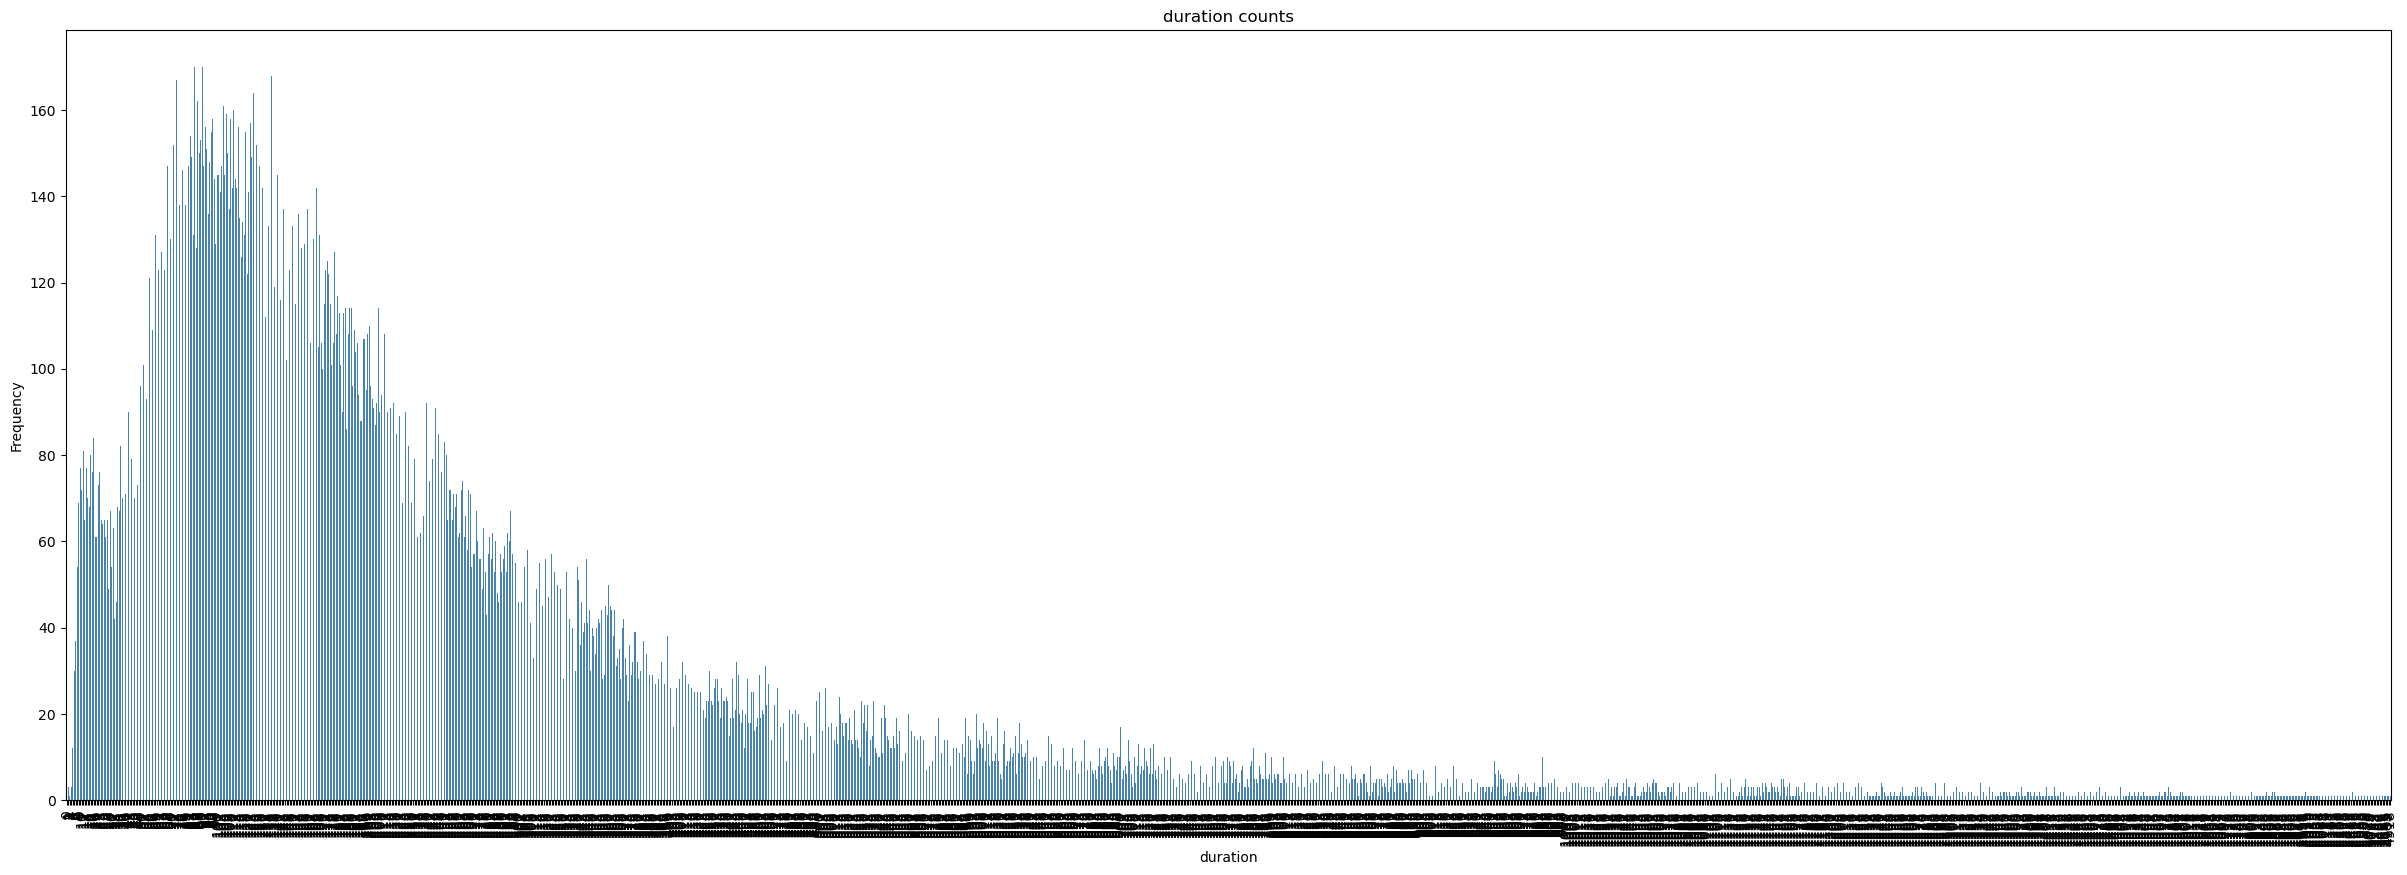

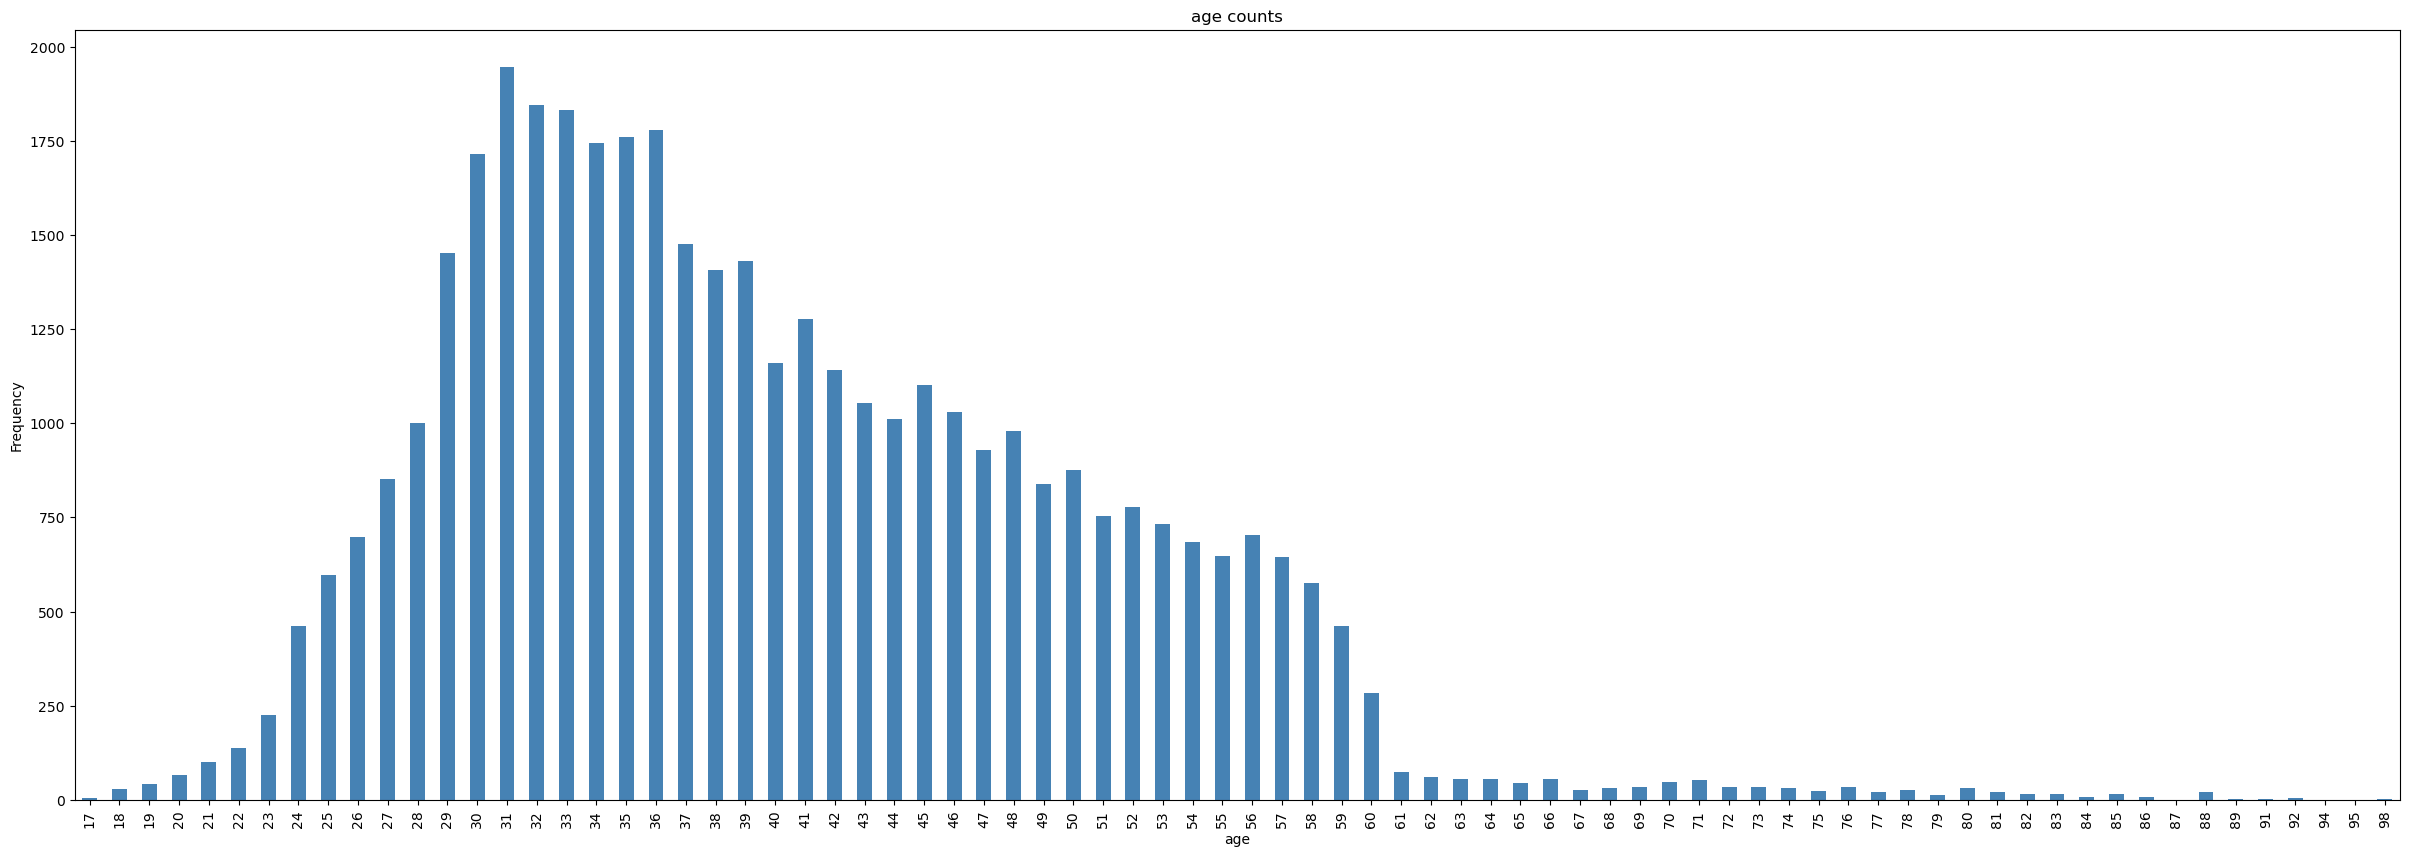

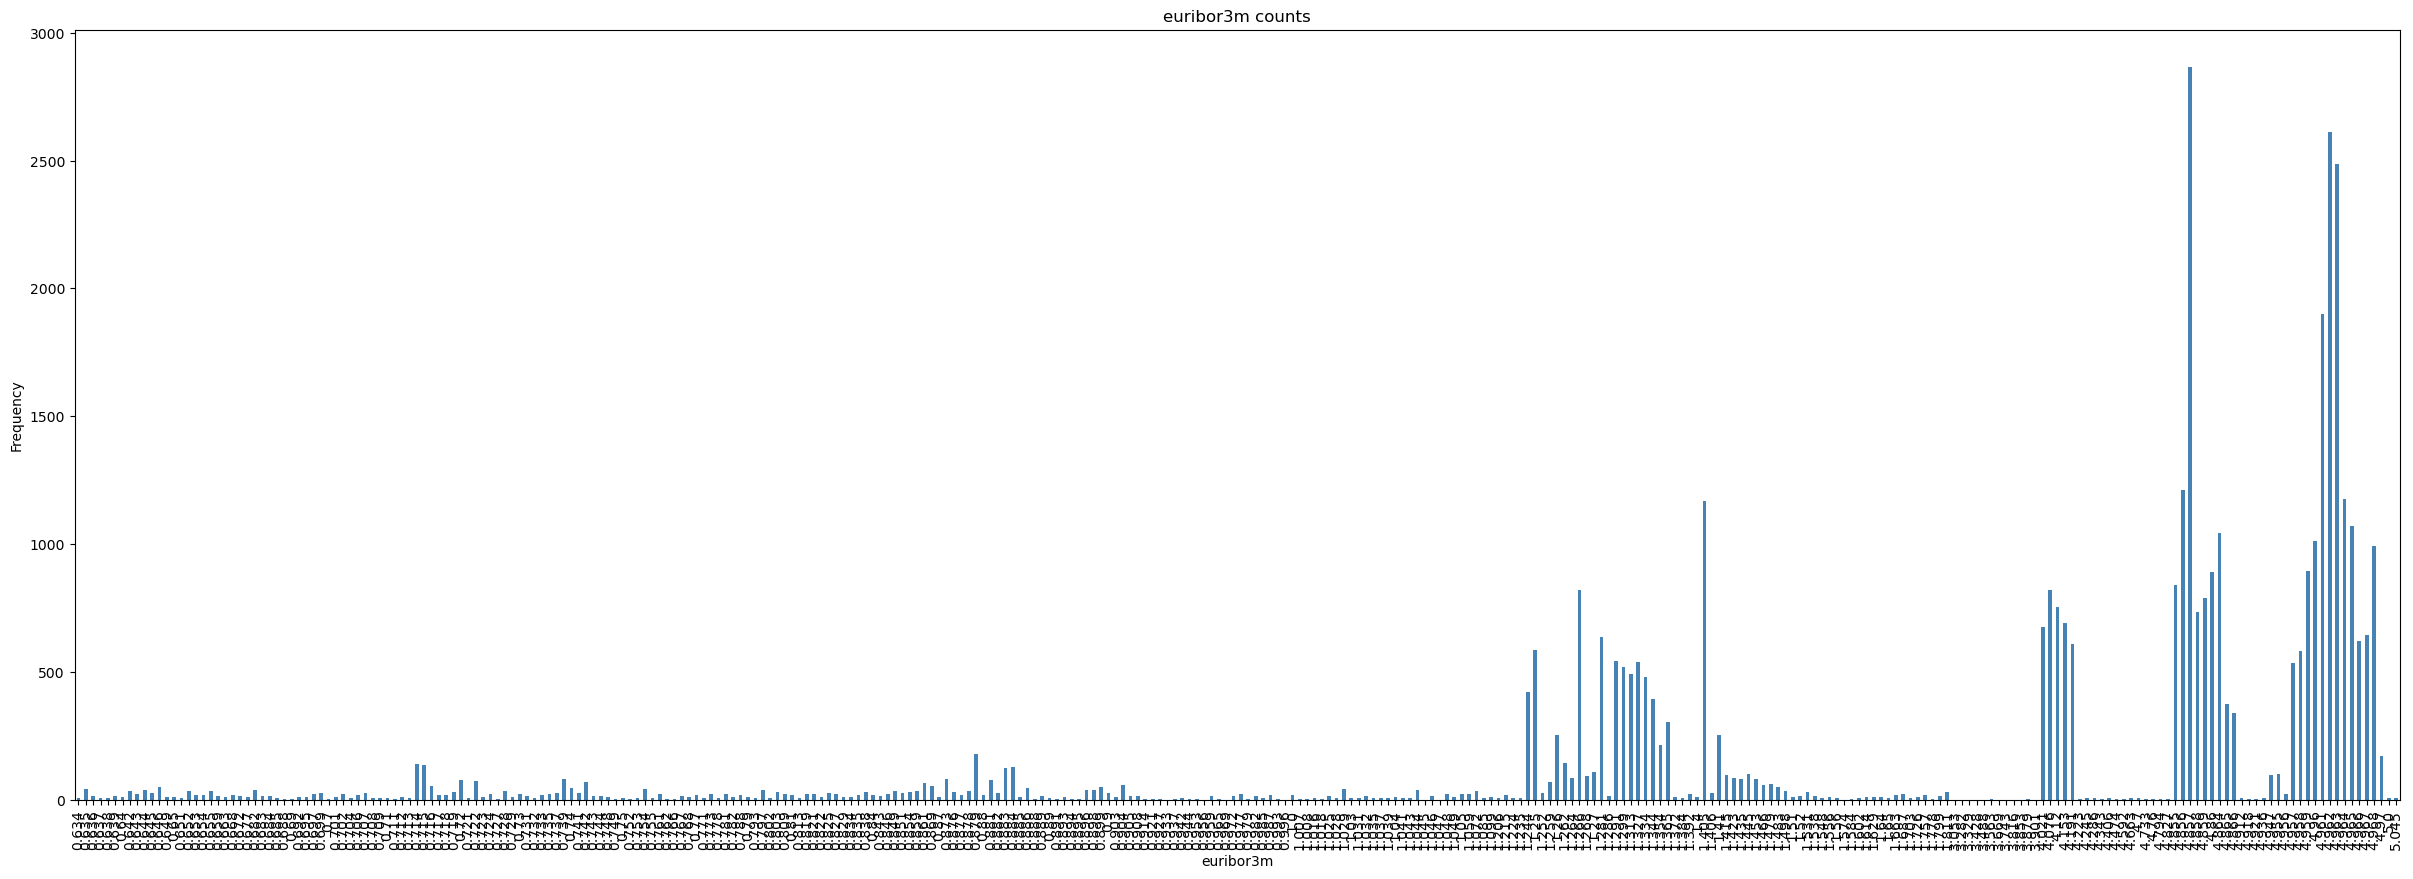

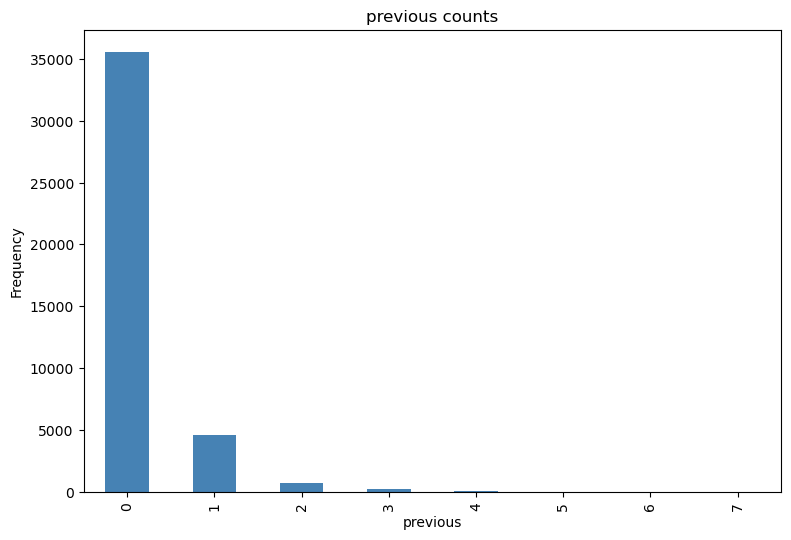

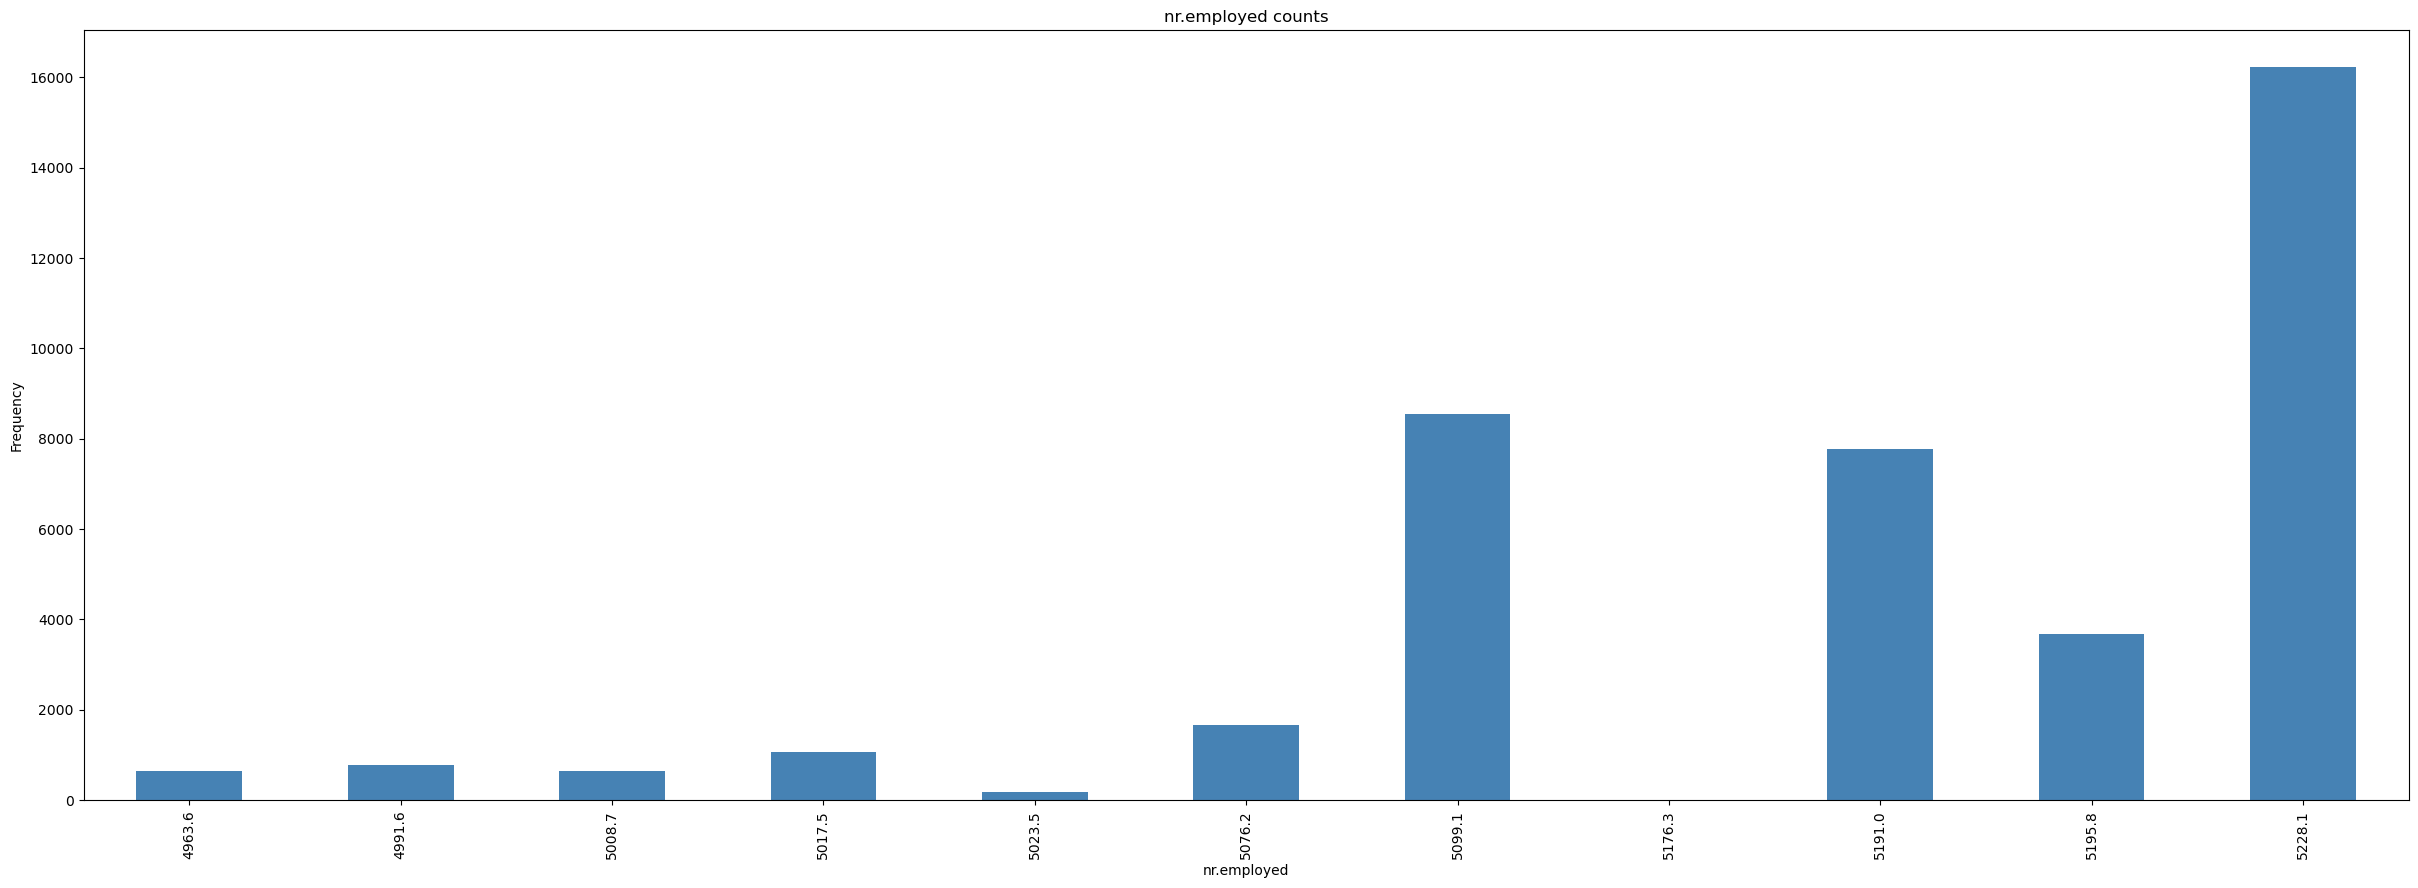

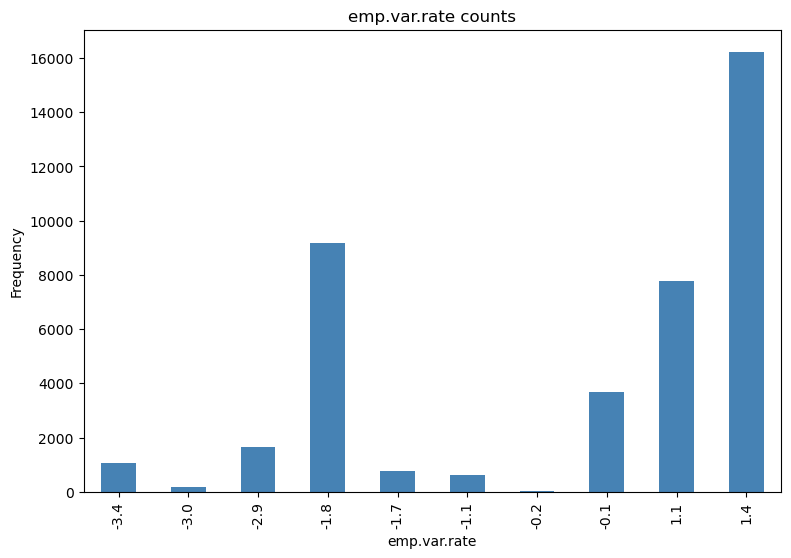

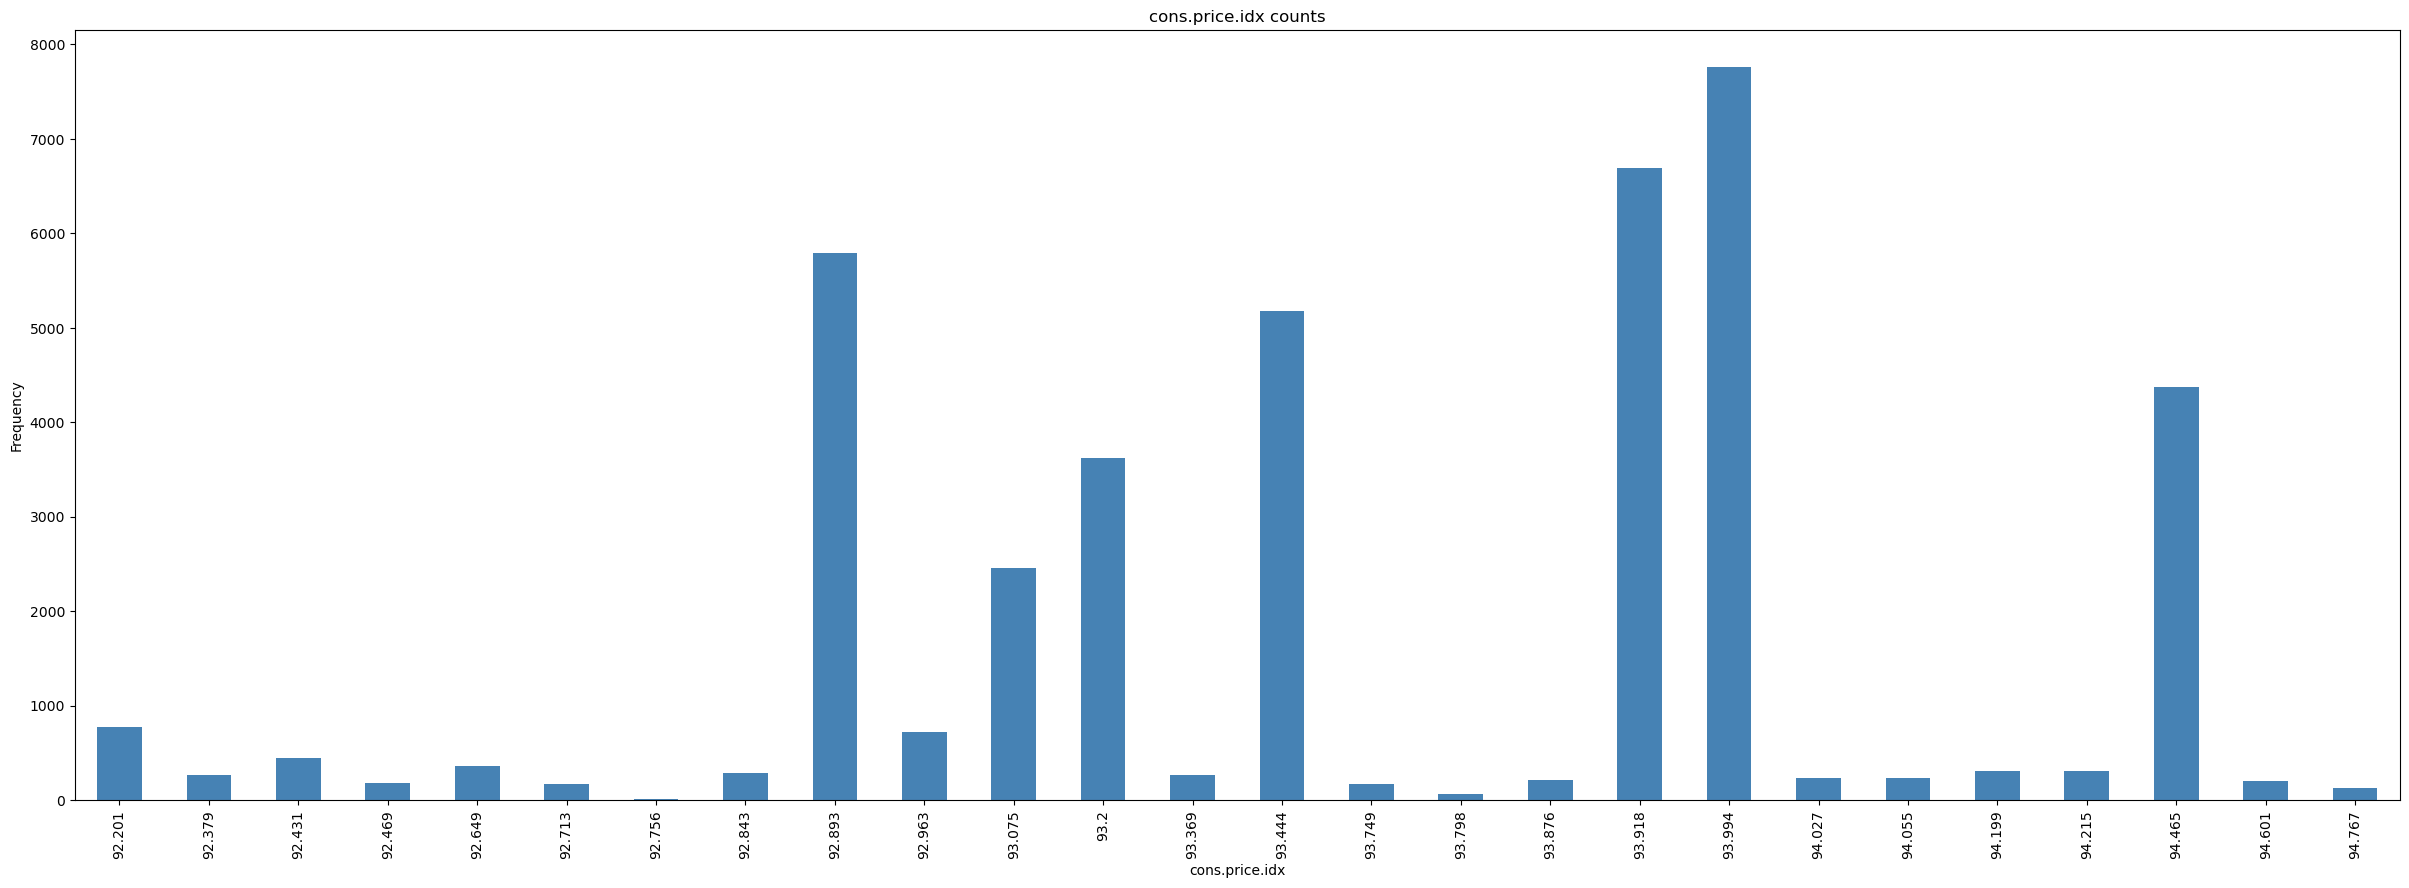

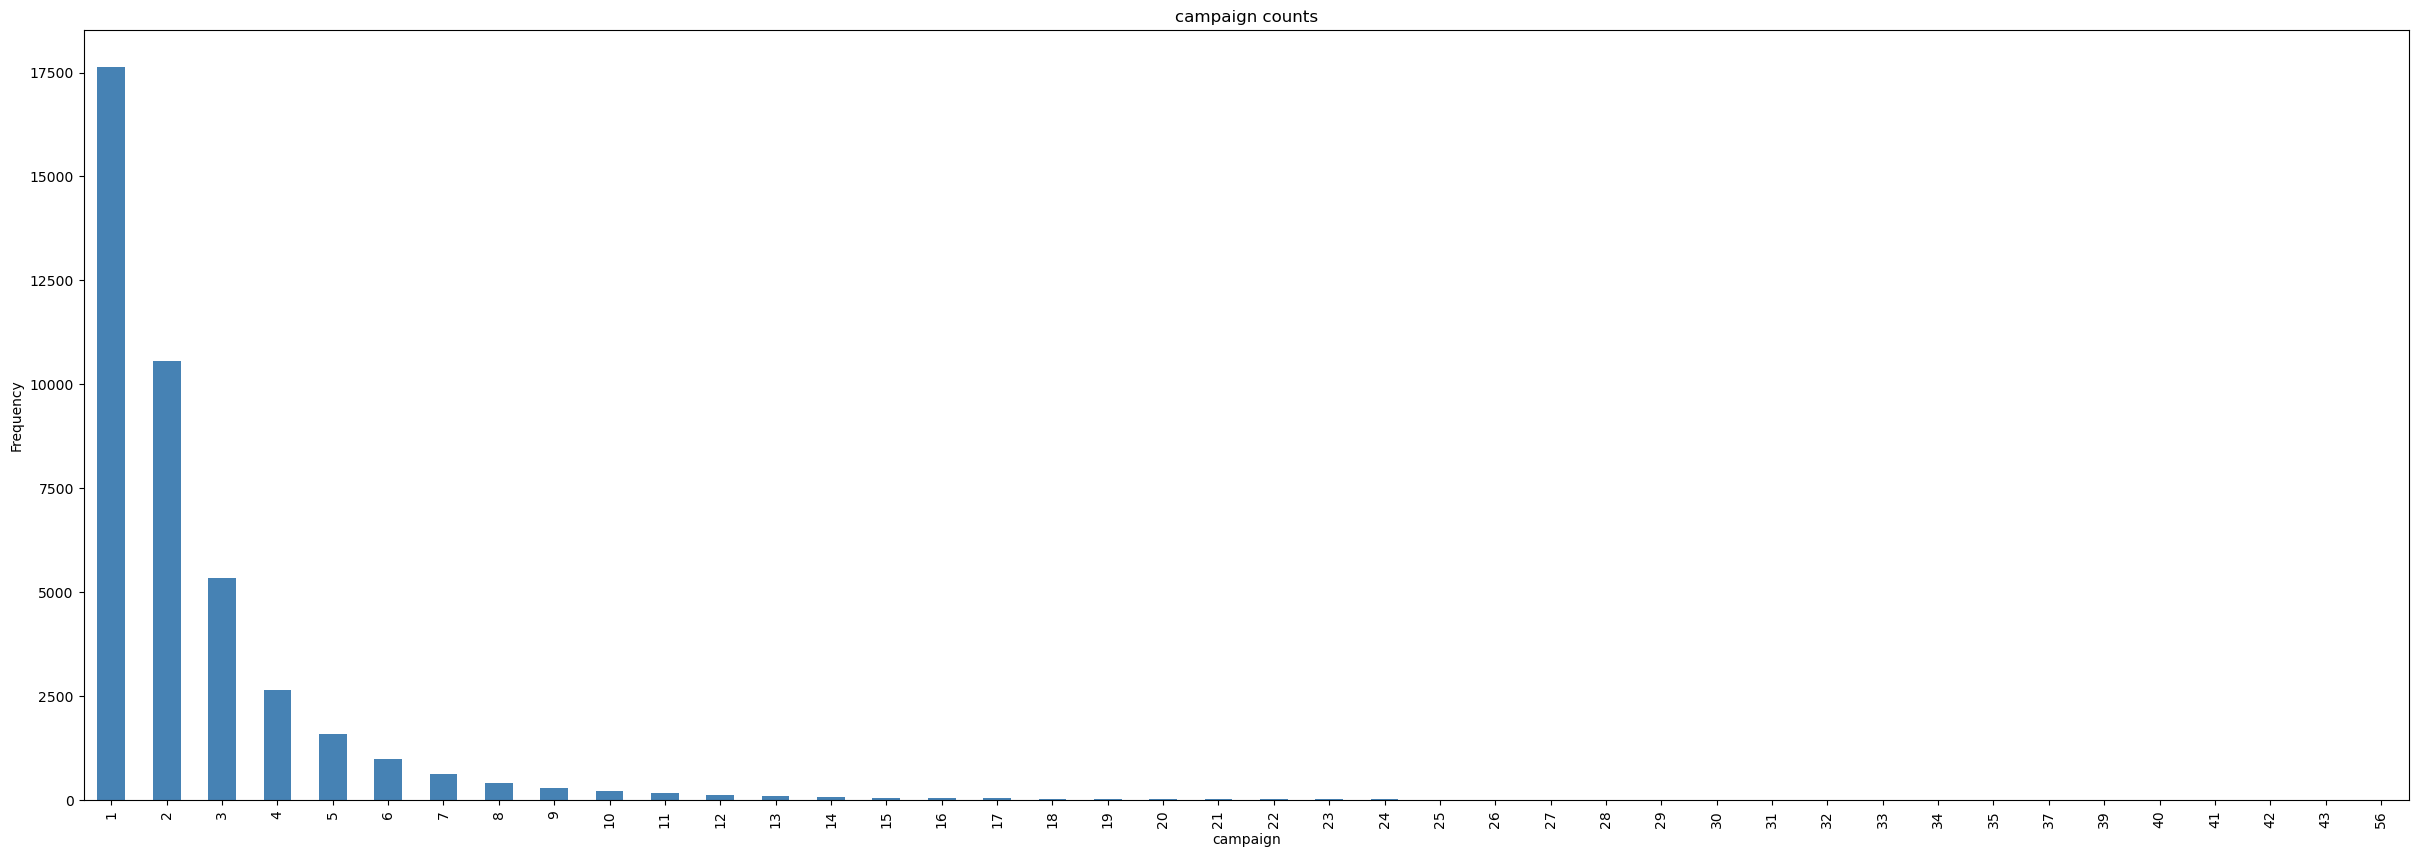

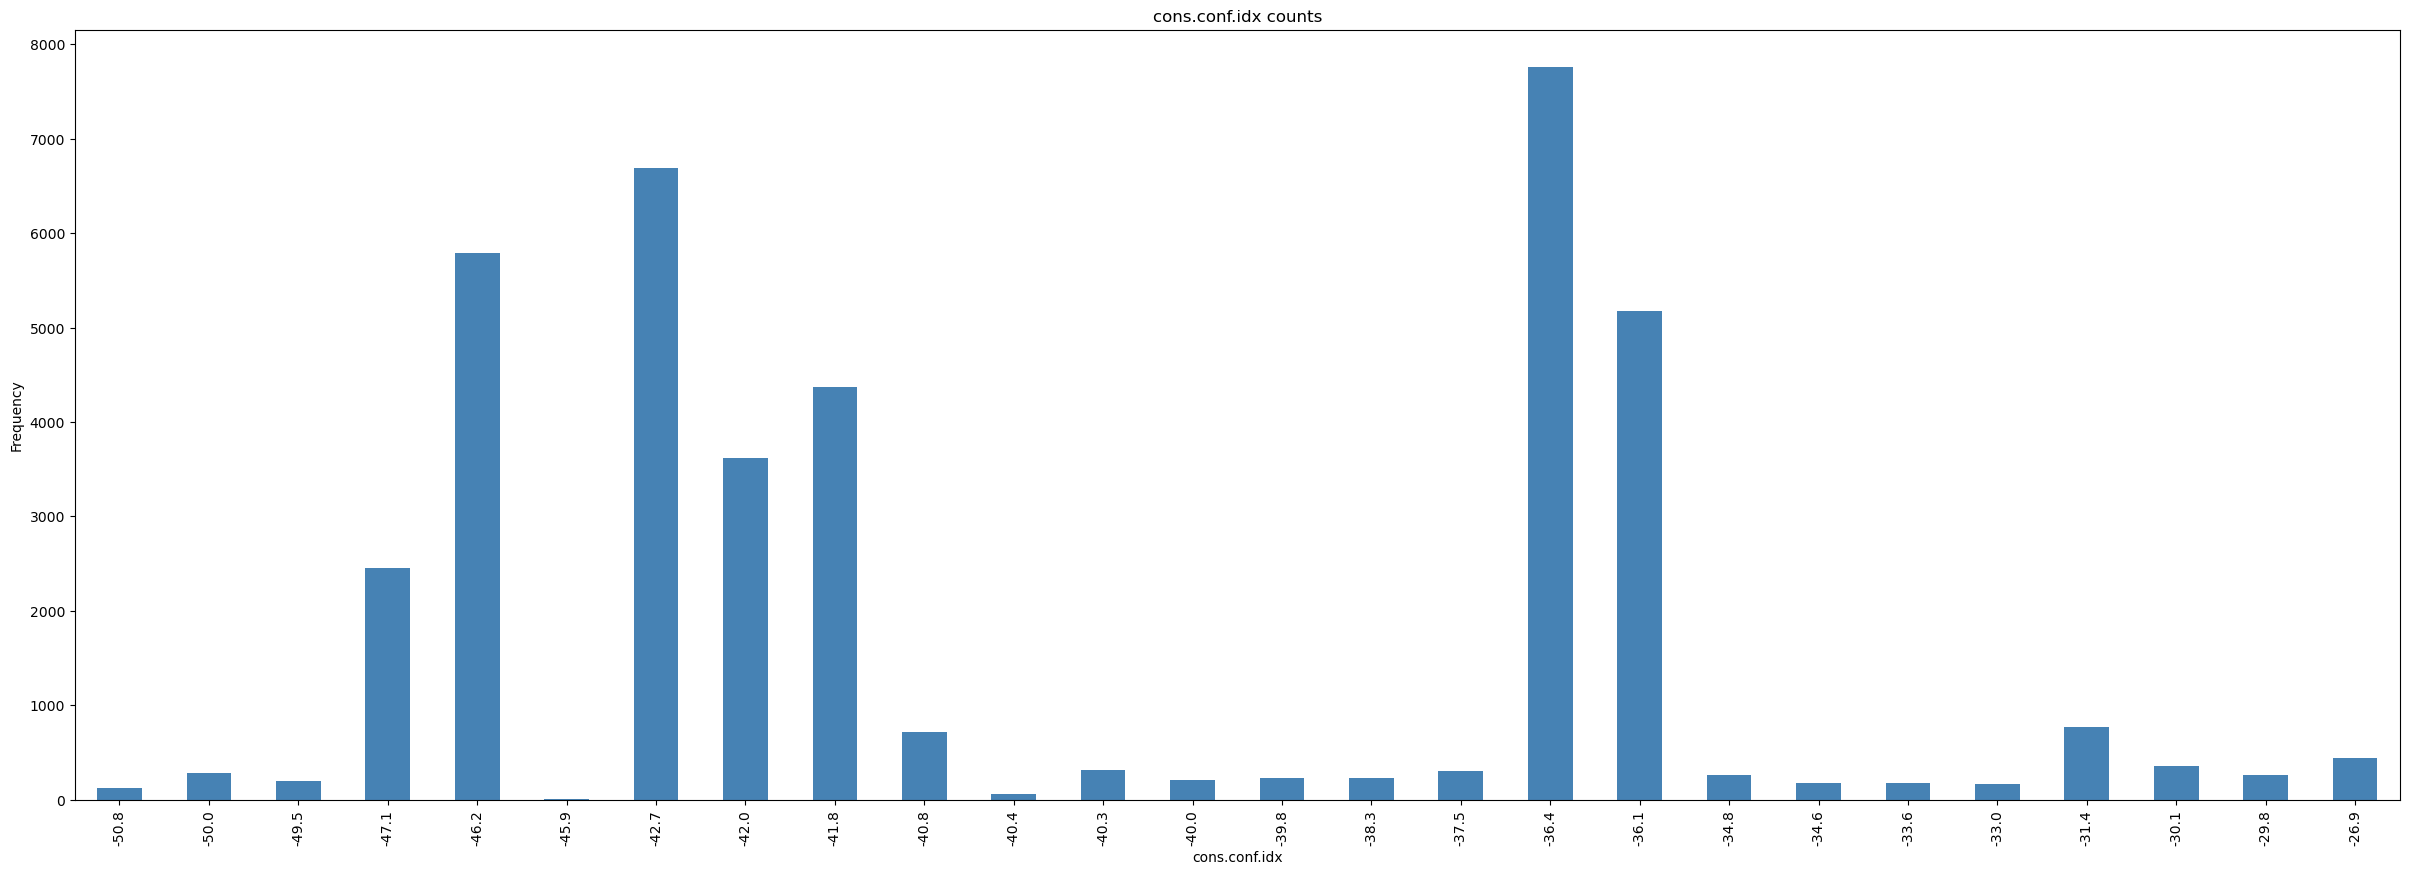

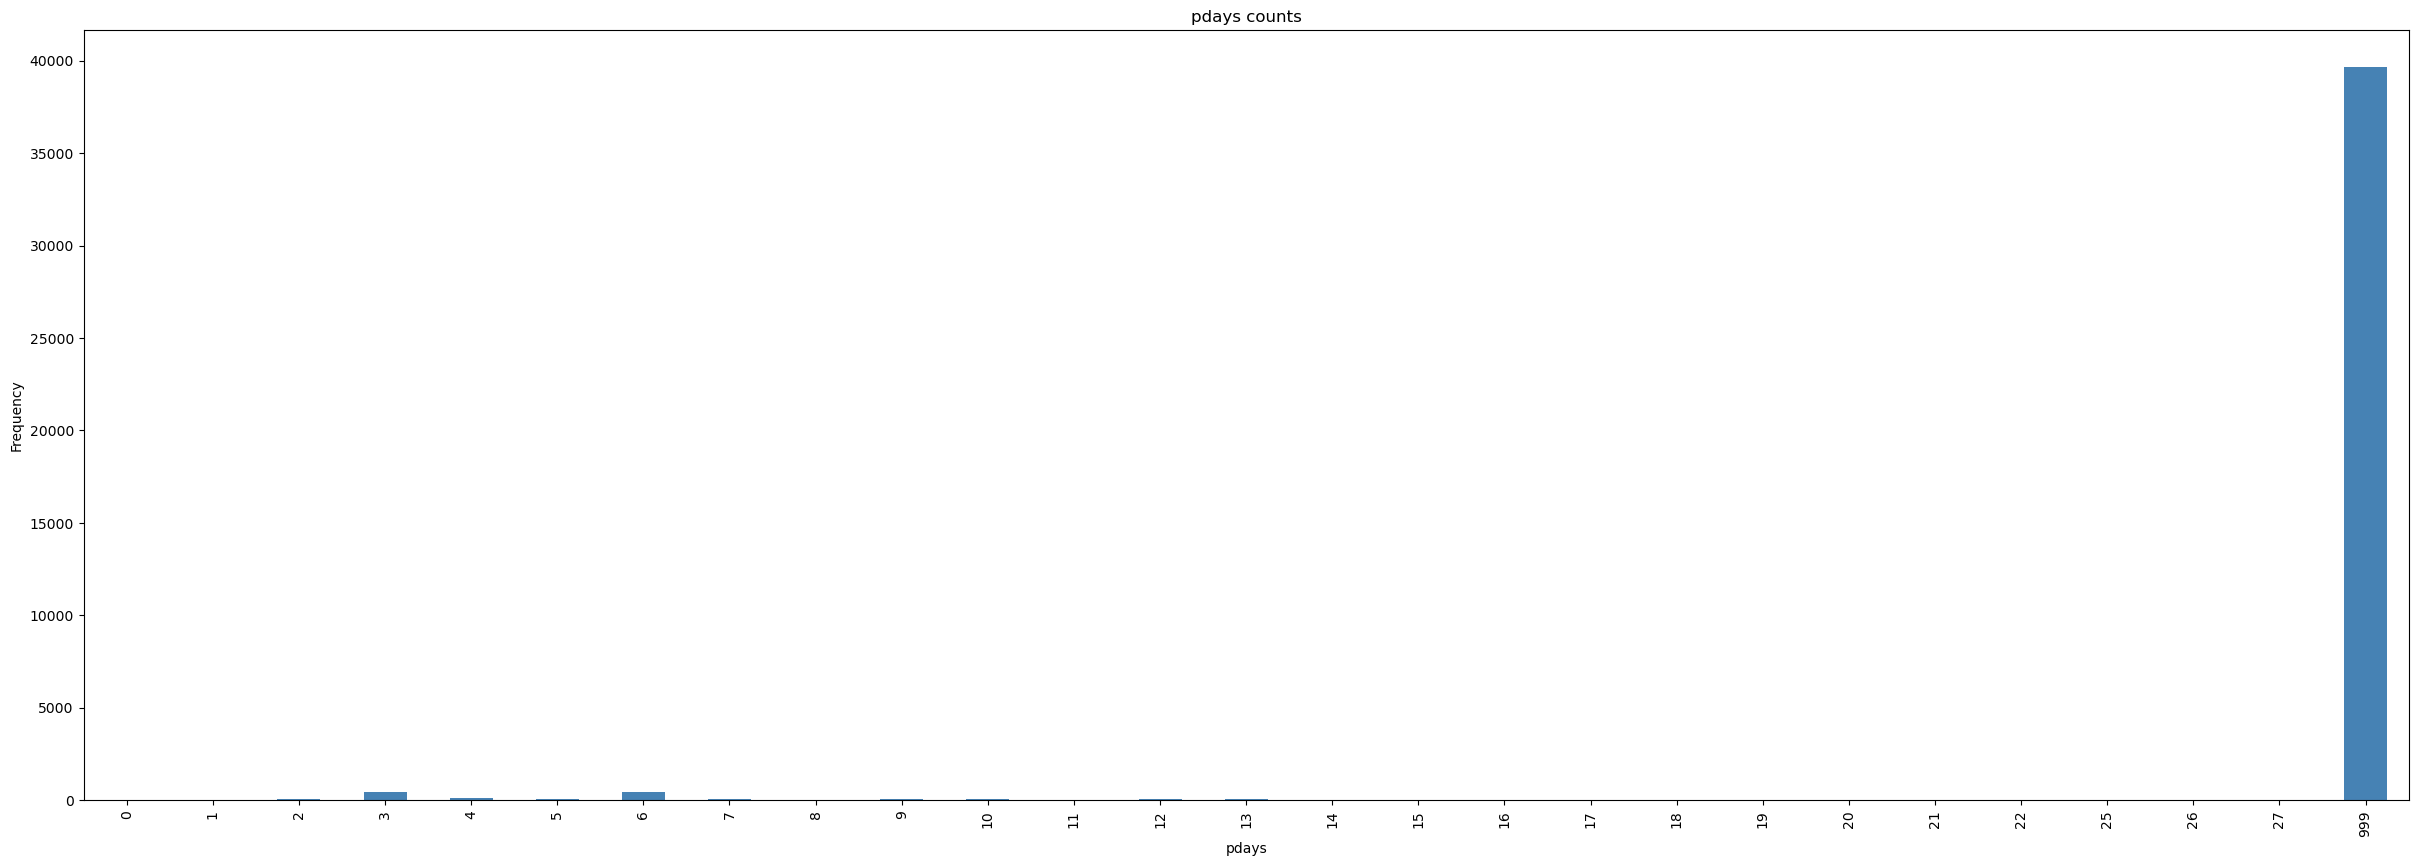

In [48]:
for col in return_numerical(bank):
    counts = bank[col].value_counts().sort_index()
    if len(counts)>10:
        fig = plt.figure(figsize = (30,10))
    else:
        fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color = 'steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

## Machine Learning

목적> 전화 마케팅 캠페인을 통해 고객이 예금을 예치할 것인지 예측하는 모델

In [84]:
#object타입을 가지고 있는 컬럼의 값들을 수치화하기 위해 수동으로 값 부여

bank['job'] = bank['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))
bank['housing'] = bank['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
bank['loan'] = bank['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
bank['y'] = bank['y'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
bank['default'] = bank['default'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
bank['poutcome'] = bank['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))
bank['pdays'] = bank['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))

In [92]:
#나머지 중요하지 않다고 생각되는 변수들은 삭제

# bank.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)
bank.drop(['marital'], axis=1, inplace = True)

In [100]:
#Train-Test데이터 Split
from sklearn.model_selection import train_test_split

#타겟변수는 y이고 나머지 변수들이 모두 x변수
#x변수-bank 데이터에서 y 변수만 드랍한것 / y변수- 컬럼'y'
x = bank.drop("y", axis = 1) #컬럼을 지우기 위해서는 axis=1, index를 drop하려면 axis=0
y = bank['y']
x.sample()

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [95]:
bank.drop(['education', 'duration'], axis=1, inplace = True)

In [102]:
#데이터 불균형 처리 방법 - 오버샘플링 ()
#오버샘플링의 경우, 정보가 손실되지 않는다는 장점이 있으나, 복제된 관측치를 원래 데이터 셋에 추가하기만 하면
#여러 유형의 관측치를 다수 추가하여 오버 피팅을 초래할 수도 있다
#그럴 때 합성 데이터를 생성하면 단순 복제가 아닌 새로운 복제본을 만들어낼 수 있다 => SMOTE 알고리즘

#데이터스케일링 먼저 진행

from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', len(x_train))
print('Resampled dataset shape', len(x_train))

Original dataset shape 30891
Resampled dataset shape 30891


In [104]:
(x_train.shape[1])

14

In [106]:
# 데이터 스케일링
# from sklearn.prfeprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0,1))
# scaler.fit_transform(X_train)
# X_train = scaler.fit_transform(X_train)

# #데이터 복제

# from sklearn.datasets import make_classification
# from sklearn.decomposition import PCA
# from imblearn.over_sampling import SMOTE

# # 모델설정
# sm = SMOTE(ratio='auto', kind='regular')

# # train데이터를 넣어 복제함
# X_resampled, y_resampled = sm.fit_sample(x_train,list(y_train))

# print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

In [105]:
from collections import Counter
from imblearn.over_sampling import SMOTE
#Counter 생성자는 여러 형태의 데이터를 인자로 받는다, 중복된 데이터가 저장된 배열을 인자로 넘기면 각 원소가 몇 번씩 나오는지가 저장된 객체가 나온다

counter = Counter(y_train)
print('Before', counter)

smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
#y에 yes라고 답한 샘플의 개수가 너무 적기 때문에 복제해서 다른 변수와 크기에 맞게 

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 27404, 1: 3487})
After Counter({0: 27404, 1: 27404})


## Modelling with KNN

In [115]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
s = StandardScaler()

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(s.fit_transform(x_train), y_train)

def classifier(clf, x_train, x_test, y_train, y_test):
    classifier(knn, s.fit_transform(x_smote), s.transfor(x_test), y_smote, y_test)

In [127]:
from sklearn.metrics import *

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit( s.fit_transform(x_train), y_train)
    pred_i = knn.predict(s.transform(x_test))
    error_rate.append(np.mean(pred_i != y_test))

acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(s.fit_transform(x_train), y_train)
    yhat = neigh.predict(s.transform(x_test))
    acc.append(metrics.accuracy_score(y_test, yhat))

NameError: name 'metrics' is not defined

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))